<a href="https://colab.research.google.com/github/vikasShashi-dot/MachineLearning/blob/main/LAB4/Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


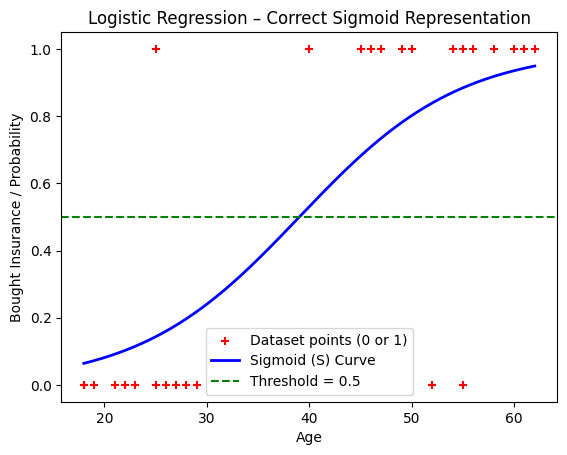

Model Accuracy: 1.0


In [3]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import math

df = pd.read_csv("/content/sample_data/insurance_data.csv")

X = df[['age']]
y = df['bought_insurance']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.9, random_state=10
)

model = LogisticRegression()
model.fit(X_train, y_train)


plt.scatter(df['age'], df['bought_insurance'],
            color='red', marker='+', label='Dataset points (0 or 1)')

age_range = np.linspace(df['age'].min(), df['age'].max(), 300).reshape(-1, 1)

probabilities = model.predict_proba(age_range)[:, 1]

plt.plot(age_range, probabilities,
         color='blue', linewidth=2, label='Sigmoid (S) Curve')

plt.axhline(y=0.5, color='green', linestyle='--', label='Threshold = 0.5')

plt.xlabel("Age")
plt.ylabel("Bought Insurance / Probability")
plt.title("Logistic Regression – Correct Sigmoid Representation")
plt.legend()
plt.show()

print("Model Accuracy:", model.score(X_test, y_test))

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

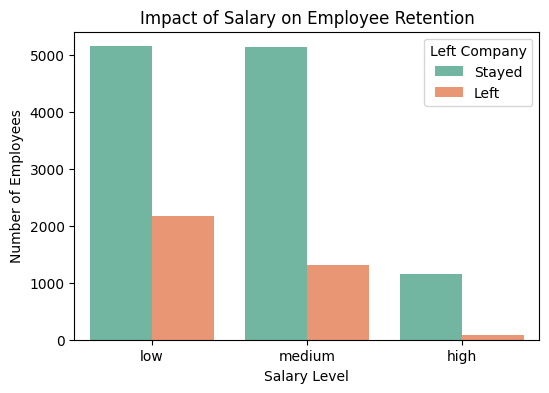

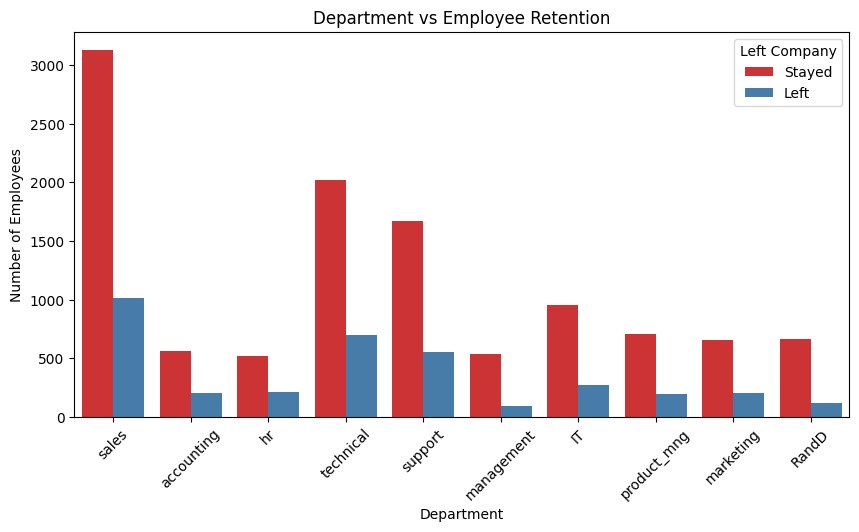


Model Accuracy: 0.7867

Confusion Matrix:
 [[2120  174]
 [ 466  240]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      2294
           1       0.58      0.34      0.43       706

    accuracy                           0.79      3000
   macro avg       0.70      0.63      0.65      3000
weighted avg       0.76      0.79      0.77      3000



In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


df = pd.read_csv("/content/sample_data/HR_comma_sep.csv")
print(df.head())
print(df.info())
print(df.describe())

print(df['left'].value_counts())

df_encoded = df.copy()

# Convert categorical 'salary' to ordinal values (low=0, medium=1, high=2)
salary_mapping = {'low':0, 'medium':1, 'high':2}
df_encoded['salary'] = df_encoded['salary'].map(salary_mapping)

# One-hot encode the 'Department' column
df_encoded = pd.get_dummies(df_encoded, columns=['Department'], drop_first=True)

correlation = df_encoded.corr()
print("\nCorrelation with 'left':\n", correlation['left'].sort_values(ascending=False))


# ----------------------------
# Bar chart: Impact of Salary on Retention
# ----------------------------
plt.figure(figsize=(6,4))
sns.countplot(x='salary', hue='left', data=df, palette='Set2')
plt.title('Impact of Salary on Employee Retention')
plt.xlabel('Salary Level')
plt.ylabel('Number of Employees')
plt.legend(title='Left Company', labels=['Stayed','Left'])
plt.show()

# ----------------------------
# Bar chart: Department vs Retention
# ----------------------------
plt.figure(figsize=(10,5))
sns.countplot(x='Department', hue='left', data=df, palette='Set1') # Corrected 'department' to 'Department'
plt.title('Department vs Employee Retention')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.legend(title='Left Company', labels=['Stayed','Left'])
plt.xticks(rotation=45)
plt.show()

# ----------------------------
# Prepare Data for Logistic Regression
# ----------------------------
# Features and Target
# Include original numerical features, mapped 'salary', and one-hot encoded 'Department' features
features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
            'time_spend_company', 'Work_accident', 'promotion_last_5years', 'salary']

# Add the newly created one-hot encoded department columns to the features list
features.extend([col for col in df_encoded.columns if col.startswith('Department_')])

X = df_encoded[features]
y = df_encoded['left']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------------
# Build Logistic Regression Model
# ----------------------------
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# ----------------------------
# Model Prediction and Accuracy
# ----------------------------
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Dataset Head:
   animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   class_type  
0           1  
1           1  
2    

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


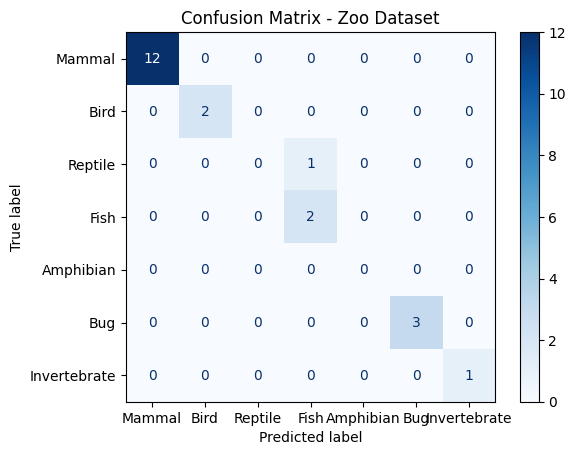

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ----------------------------
# Load dataset
# ----------------------------
df = pd.read_csv("/content/sample_data/zoo-data.csv")
class_type_df = pd.read_csv("/content/sample_data/zoo-class-type.csv")

print("Dataset Head:\n", df.head())
print("\nClass Type Mapping:\n", class_type_df)

# ----------------------------
# Data Preprocessing
# ----------------------------

# Check for missing values
print("\nMissing values in dataset:\n", df.isnull().sum())

# If there are missing values, fill them with 0 (or median for numeric columns)
df.fillna(0, inplace=True)

X = df.drop(['class_type', 'animal_name'], axis=1)
y = df['class_type']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# ----------------------------
# Model Prediction & Accuracy
# ----------------------------
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred, labels=class_type_df['Class_Number'])
print("\nConfusion Matrix:\n", cm)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=class_type_df['Class_Type'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Zoo Dataset")
plt.show()